In [2]:
import pymysql
import pickle

MYSQL_USER_DATA_SAVED_FILE = "mysql/userinfo"

f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [4]:
# DB 접속
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into pydb_test(name, price) values (%s, %s)
"""

# 위의 쿼리를 기반으로 데이터 입력
cursor.execute(sql, ('Xeon Server', 10000000))
cursor.execute(sql, ('FPGA Server', 2000000000))
cursor.execute(sql, ('GPU Server', 1000000000))
cursor.execute(sql, ('RTX 3090', 4000000))

db.commit()

db.close()

print('파이썬을 활용한 db 입력 성공!')

파이썬을 활용한 db 입력 성공!


In [5]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    select * from pydb_test;
"""

cursor.execute(sql)

# 실행을 통해 데이터를 확보해놨고
# 해당 내용을 가져오는 작업이 fetchall()
rows = cursor.fetchall()

# 가만 보면 PreparedStatement 의 RowMapper 와 유사한 것을 볼 수 있음
for row in rows:
    print(row)

db.close()

print('파이썬을 활용한 db 테이블 조회 성공!')

(1, 'Xeon Server', 10000000)
(2, 'FPGA Server', 2000000000)
(3, 'GPU Server', 1000000000)
(4, 'RTX 3090', 4000000)
파이썬을 활용한 db 테이블 조회 성공!


In [7]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    # 여기서 사용할 스키마 하나 생성!
    db = 'pydb'
)

# 가져온 DB 정보를 딕셔너리 형태로 관리할 수 있게 만들어줌
# 리턴되는 정보가 Tuple(튜플) 이기 때문에 변환이 필요
cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydb_test;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print('id:', row['id'], ', name:', row['name'], ', price: ', row['price'])

db.close()

print('파이썬을 활용한 db 테이블 조회 성공!')

id: 1 , name: Xeon Server , price:  10000000
id: 2 , name: FPGA Server , price:  2000000000
id: 3 , name: GPU Server , price:  1000000000
id: 4 , name: RTX 3090 , price:  4000000
파이썬을 활용한 db 테이블 조회 성공!


In [8]:
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    drop table pydb_test;
"""

cursor.execute(sql)

db.commit()
db.close()

print('파이썬을 활용한 db 테이블 삭제 성공!')

파이썬을 활용한 db 테이블 삭제 성공!


In [9]:
# 소수점 데이터 처리
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)

db.commit()
db.close()

print('float 형태의 테이블 생성 성공!')

float 형태의 테이블 생성 성공!


In [10]:
import time
import math
import calendar
import datetime
import numpy as np

In [12]:
sample_time = np.arange(0, 10, 0.001)

print(sample_time)
print(len(sample_time))

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]
10000


In [13]:
# np.random.normal() 의 경우엔 확률 분포중 가우시안(정규) 분포를 따르는 값들을 생성함
# 복잡하게 생각할 필요 없이 그냥 랜덤값 만들었다고 생각해도 무방함
noise = np.random.normal(size = len(sample_time))

print(noise)

[-0.32545997 -0.32289572 -0.81463274 ...  0.20600704 -2.08235494
  1.30987211]


In [14]:
# P = VI
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[2.67454003 2.67706678 2.18521727 ... 3.08877303 0.80452729 4.2007984 ]
[ 2.27261624  2.27966879  1.79239666 ... -0.90042447 -3.18041594
  0.2201915 ]


In [15]:
!pip install matplotlib

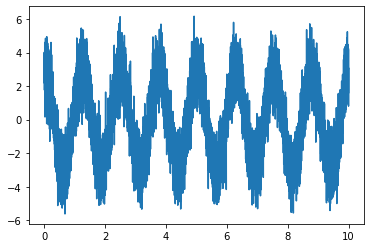

In [16]:
import matplotlib.pyplot as plt

plt.plot(sample_time, voltage)
plt.show()

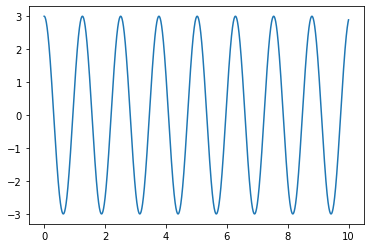

In [17]:
# w = 2 * pi * f
# f 는 진동수 -> 1초에 몇 번 진동하는가
# f = w / (2 * pi)
# 주기 T = 1 / f
non_noise_voltage = 3 * np.cos(5 * sample_time)

plt.plot(sample_time, non_noise_voltage)
plt.show()

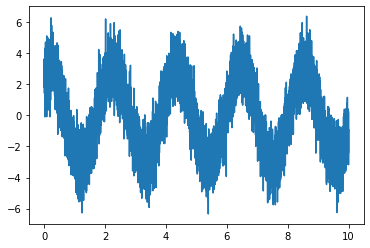

In [18]:
plt.plot(sample_time, current)
plt.show()

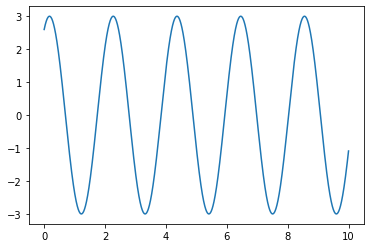

In [19]:
non_noise_current = 3 * np.sin(3 * sample_time + (math.pi / 3))

plt.plot(sample_time, non_noise_current)
plt.show()

In [22]:
ts = calendar.timegm(time.gmtime())

print(ts)

1652774551


In [23]:
print(datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2022-05-17 17:02:31


In [25]:
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

print(sample_time)
print(voltage)
print(current)

[0.000e+00 1.000e-03 2.000e-03 ... 9.997e+00 9.998e+00 9.999e+00]
[2.67454   2.6770668 2.1852174 ... 3.088773  0.8045273 4.2007985]
[ 2.2726161  2.2796688  1.7923967 ... -0.9004245 -3.1804159  0.2201915]


In [26]:
ts = (sample_time * 1000) + ts
print(ts)

[1.65277455e+09 1.65277455e+09 1.65277455e+09 ... 1.65278455e+09
 1.65278455e+09 1.65278455e+09]


In [27]:
curr_time = []

for i in range(len(sample_time)):
    curr_time.append(
        datetime.
            datetime.
                fromtimestamp(ts[i]).
                    strftime('%Y-%m-%d %H:%M:%S')
    )
    
print(curr_time)

['2022-05-17 17:02:31', '2022-05-17 17:02:32', '2022-05-17 17:02:33', '2022-05-17 17:02:34', '2022-05-17 17:02:35', '2022-05-17 17:02:36', '2022-05-17 17:02:37', '2022-05-17 17:02:38', '2022-05-17 17:02:39', '2022-05-17 17:02:40', '2022-05-17 17:02:41', '2022-05-17 17:02:42', '2022-05-17 17:02:43', '2022-05-17 17:02:44', '2022-05-17 17:02:45', '2022-05-17 17:02:46', '2022-05-17 17:02:47', '2022-05-17 17:02:48', '2022-05-17 17:02:49', '2022-05-17 17:02:50', '2022-05-17 17:02:51', '2022-05-17 17:02:52', '2022-05-17 17:02:53', '2022-05-17 17:02:54', '2022-05-17 17:02:55', '2022-05-17 17:02:56', '2022-05-17 17:02:57', '2022-05-17 17:02:58', '2022-05-17 17:02:59', '2022-05-17 17:03:00', '2022-05-17 17:03:01', '2022-05-17 17:03:02', '2022-05-17 17:03:03', '2022-05-17 17:03:04', '2022-05-17 17:03:05', '2022-05-17 17:03:06', '2022-05-17 17:03:07', '2022-05-17 17:03:08', '2022-05-17 17:03:09', '2022-05-17 17:03:10', '2022-05-17 17:03:11', '2022-05-17 17:03:12', '2022-05-17 17:03:13', '2022-05-1

In [28]:
# 작성한 데이터를 기준으로 테이블에 정보 저장하기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    passwd = mysql_user_info['password'],
    db = 'pydb'
)

cursor = db.cursor()

sql = """
    insert into power_data(
        voltage, current, vendor, name, reg_date
    ) values (
        %s, %s, %s, %s, %s
    )
"""

try:
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql,
                (
                    str(voltage[i]),
                    str(current[i]),
                    'EDDI',
                    'P32N21BTN77PW',
                    curr_time[i]
                )
            )
        
        db.commit()
finally:
    db.close()

print('float 데이터 및 날자 형식 데이터 입력 완료!')

float 데이터 및 날자 형식 데이터 입력 완료!


In [ ]:
#          App(앱)
#            |
# Vue <-> Spring <-> DB(JPA)
#  |        |         |
#  ------ Python -----

In [29]:
# Spring - Python 형태의 구성
!python --version

Python 3.8.8


In [31]:
!pip install flask_cors

In [2]:
from flask import Flask, url_for, request, jsonify
from flask_cors import CORS, cross_origin

import json

In [3]:
app = Flask(__name__)

@app.route('/python-request', methods = ['GET'])
def spring2python():
    print("스프링 요청 성공!")
    data = {"spring2python Success!": True}
    
    return jsonify(data)

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
